# softmax regression with fashion mnist data

In [8]:
# loading fashion mnist data usion torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
train = FashionMNIST(root='fnist',
                     train=True,
                     download=True,
                     transform=transforms.ToTensor())
test = FashionMNIST(root='fnist',
                    train=False,
                    download=True,
                    transform=transforms.ToTensor())

In [24]:
# showing the contents of fashion mnist data
print(type(train.data))
print(train.data.shape)
print(train.classes)
print(test.data.shape)
print(test.classes)
print(train.data[0].shape)

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
torch.Size([10000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
torch.Size([28, 28])


In [15]:
# finding the first appearances of each classes in train data
import numpy as np
indices = np.zeros(shape=(10), dtype=np.int64)
for i in range(len(train.classes)):
  for idx, e in enumerate(train.targets):
    if e == i:
      indices[i] = idx
      break
print(indices)

[ 1 16  5  3 19  8 18  6 23  0]


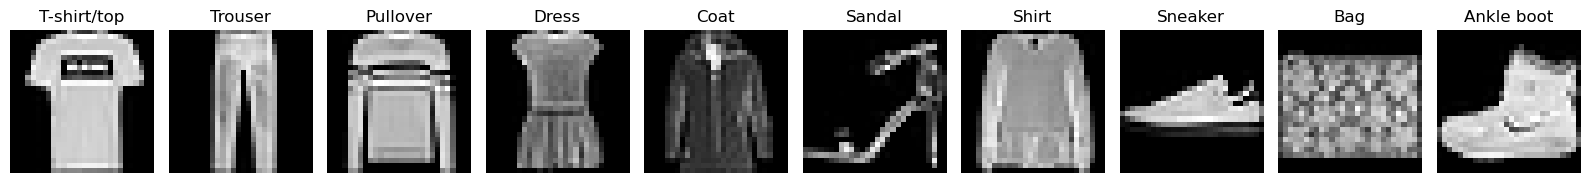

In [22]:
# showing the sample images of train data
import matplotlib.pyplot as plt
%matplotlib inline

_, axs = plt.subplots(nrows=1, ncols=10, figsize=(16, 6))
for idx, ax in zip(indices, axs):
  ax.set_title(train.classes[train.targets[idx]])
  ax.imshow(train.data[idx], cmap='gray')
  ax.axis(False)
plt.tight_layout()

In [25]:
# importing PyTorch and checking the gpu availability
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [34]:
# setting dataloader
from torch.utils.data import DataLoader
train_loader = DataLoader(train, batch_size=128, shuffle=True, drop_last=True)

In [35]:
# creating model
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [36]:
# training model for 15 epochs
for epoch in range(15):
  avg_cost = 0
  total_batch = len(train_loader)
  for x, y in train_loader:
    x = x.view(-1, 28*28).to(device)
    y = y.to(device)

    optimizer.zero_grad()
    hypothesis = model(x)
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  print(f'epoch: {epoch}, cost: {avg_cost}')

epoch: 0, cost: 0.6887834668159485
epoch: 1, cost: 0.5207568407058716
epoch: 2, cost: 0.4869656562805176
epoch: 3, cost: 0.4683760106563568
epoch: 4, cost: 0.4562545716762543
epoch: 5, cost: 0.4484615623950958
epoch: 6, cost: 0.440937876701355
epoch: 7, cost: 0.43588873744010925
epoch: 8, cost: 0.4306590259075165
epoch: 9, cost: 0.4269143044948578
epoch: 10, cost: 0.4245491027832031
epoch: 11, cost: 0.42213910818099976
epoch: 12, cost: 0.4192923307418823
epoch: 13, cost: 0.4168776571750641
epoch: 14, cost: 0.41359204053878784


In [38]:
# checking the accuracy for test data
with torch.no_grad():
  x_test = test.data.view(-1, 28*28).float().to(device)
  y_test = test.targets.to(device)


  prediction = model(x_test)
  correc_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correc_prediction.float().mean()
  print(f'accuracy: {accuracy.item()}')

accuracy: 0.7644999623298645


label: Sandal
prediction: Sandal


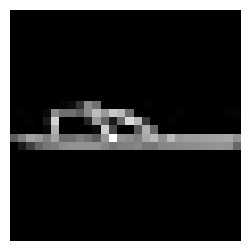

In [43]:
# checking for the sample test data
import random
with torch.no_grad():
  r = random.randint(0, len(test) - 1)
  x_test = test.data[r].view(-1, 28*28).float().to(device)
  y_test = test.targets[r].to(device)

  print(f'label: {test.classes[y_test.item()]}')
  prediction = model(x_test)
  print(f'prediction: {test.classes[torch.argmax(prediction, 1).item()]}')

  plt.figure(figsize=(3, 3))
  plt.imshow(test.data[r].view(28, 28),
             cmap='gray',
             interpolation='nearest')
  plt.axis(False)